In [1]:
import numpy as np
import sys, os, time
sys.path.append('../utilsGRF')
import BoundaryFinder as BF

In [5]:
#In all the examples, this will be fixed:

#Define the grid:
stp_ar=np.arange(0.2,1.2,0.005) #The mathematica files to check the results assume a grid spacing of 0.005. Change that if this is modified. 
pos_ar=np.arange(0.4,1.2,0.005)

minp=1e-3
maxp=1e3


defaultsettings={'pars_limit':[minp,maxp],
           'row_ar':stp_ar,
          'col_ar':pos_ar,
          'seed':1,
         'mat':None,
         'mat_pars':None}


defaultargs={'niters':5, #for testing purposes only 5 iterations, or it will take very long
      'niters_conv':100,
      'niters_conv_points':1000,
      'niters_save':2,
      'prob_par':0.5,
      'prob_replace':0.5,
      'extr_uniform':[-1,1],
      'L_project':10,
      'plotting':True,
      'verbose':True,
       'dofirstmutate':True,
      'dopullcentroids':True,
      'dopulltangents':True} 

# Binding site model with 5 binding sites, running pos-stp computation in cpp (pybind interface).

In [3]:
sys.path.append('./TFbinding')
import N4an
def myfN4an(pars):
    #Boundary finder is expecting either the correct result or None, so this function allows this. At this moment I don´t know how to return None with pybind.
    out=[None,None]
    result=N4an.interfaceps_a_GRF_N4an_x(pars)
    #print(result)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

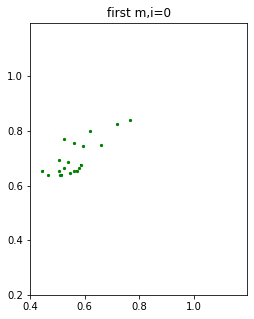

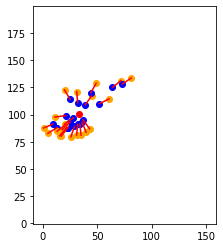

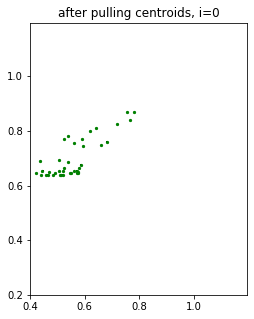

0 29.0.,

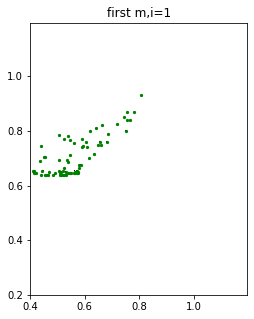

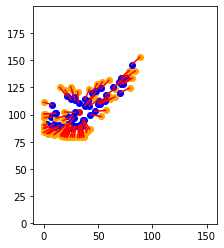

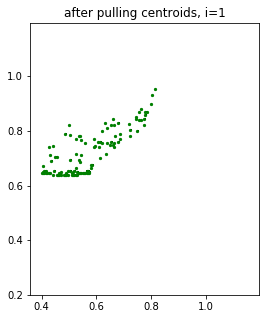

1 77.0.,

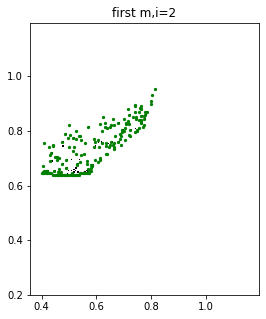

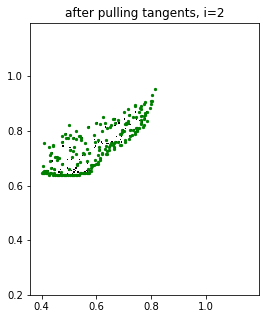

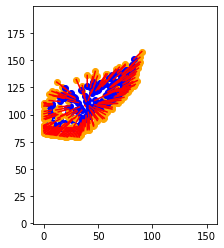

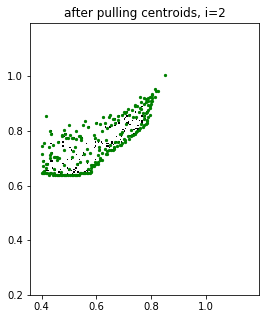

2 209.0.,

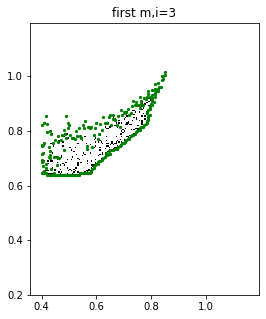

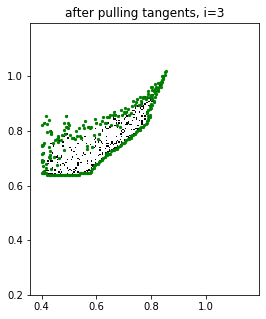

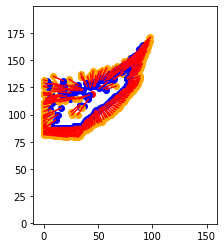

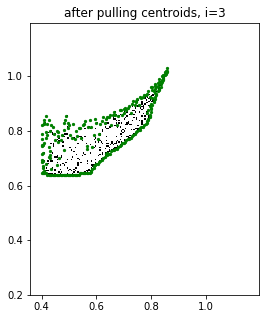

3 237.0.,

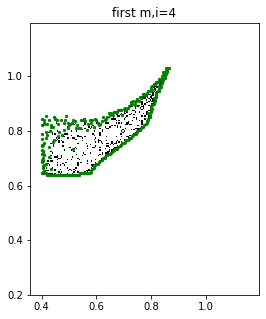

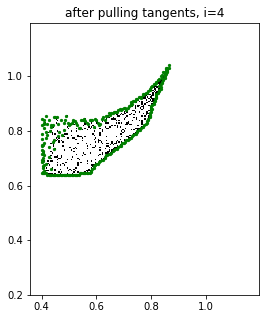

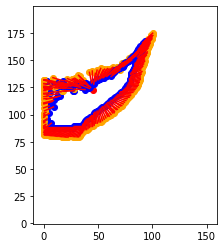

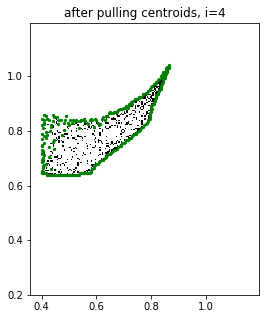

4 182.0.,time difference 334.7612421512604
False


In [5]:
#N4 all or nothing, all cooperativities

name_save='example'
outfolder='TFbinding/exampleBFN4an'

if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

constraintdict={0:{'fixed':1,'min':1,'max':1}} #K1=1 is fixed

settings=defaultsettings.copy()
settings['constraints']=constraintdict
settings['compute_x_y_f']=myfN4an
settings['npars']=15 #this can be obtained by opening the .cpp files and see how many parameters are there

#Initialise and get first 10 points
ti=time.time()
BE=BF.BoundaryExplorer(**settings)
BE.get_initial_points(10)

#Extend boundary
args=defaultargs.copy()
args['folder_save']=outfolder
args['name_save']=name_save
BE.extend_boundary(**args)

#Save final results
name='%s_last'%(name_save)
outfolder_final=outfolder
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)

te=time.time()
print('time difference',te-ti)   
print(BE.converged)

# TF binding model with Pol

In [2]:
sys.path.append('./TFbindingP')
import N5P
def myfN5P(pars):
    #Boundary finder is expecting either the correct result or None, so this function allows this. At this moment I don´t know how to return None with pybind.
    out=[None,None]
    result=N5P.interfaceps_a_GRF_N5P_x(pars,np.array([1]))
    #print(result)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

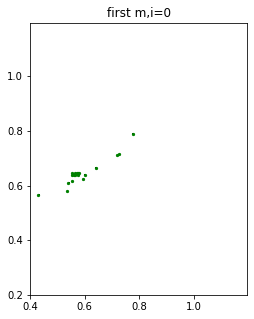

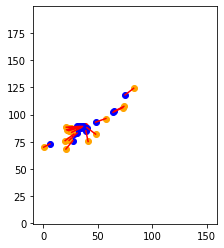

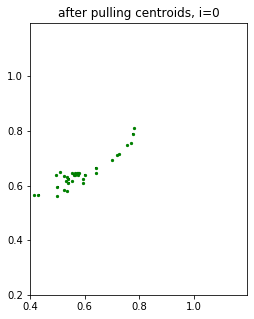

0 25.0.,

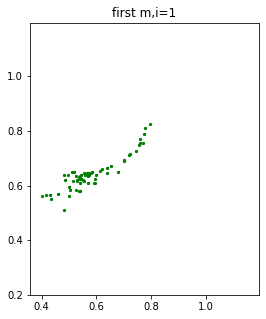

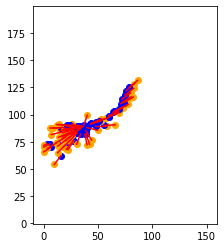

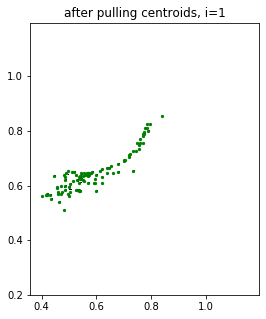

1 76.0.,

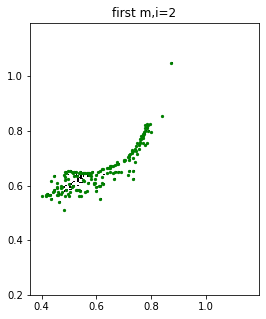

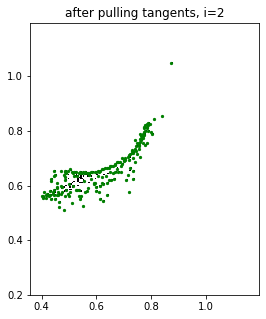

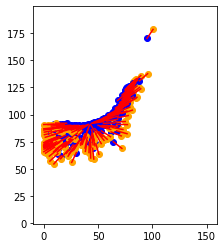

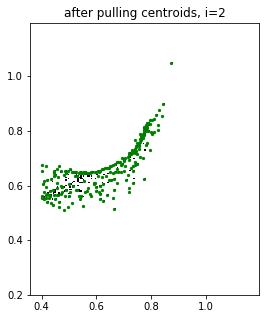

2 213.0.,

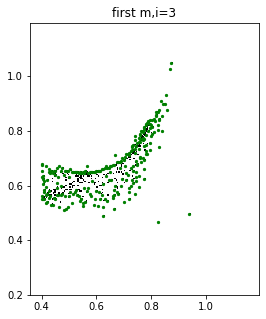

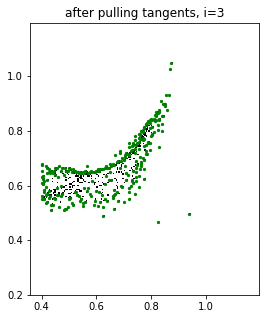

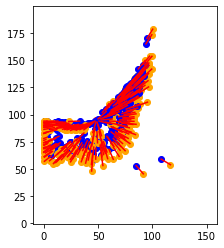

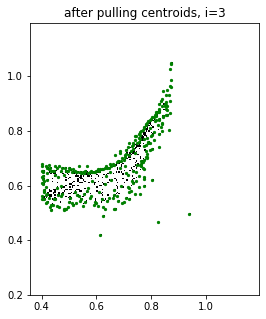

3 275.0.,

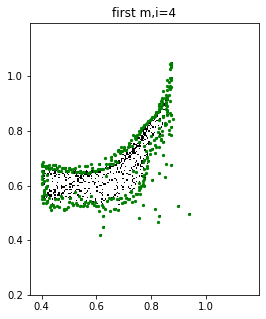

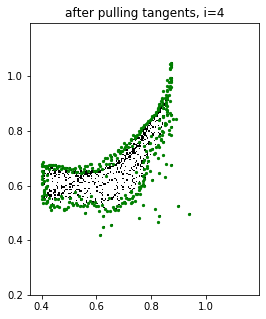

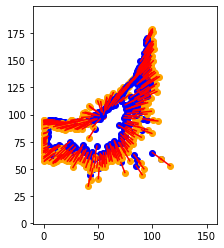

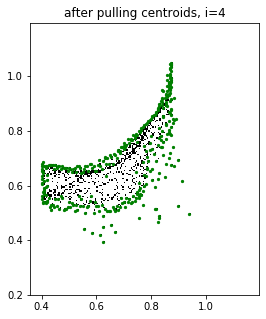

4 331.0.,time difference 586.3078289031982
False


In [8]:
#For the Pol model, pol cooperativities are >=1. Use the following constraints:

wpidx0=36 #index of the first parameter that corresponds to a cooperativity with polymerase (check .cpp file to see this)
wpidx1=61 #index of the last parameter that corresponds to a cooperativity with polymerase
constraintdict={x:{'min':1,'max':maxp} for x in range(wpidx0,wpidx1+1)} #constraints for polymerase cooperativities
constraintdict[0]={'fixed':1,'min':1,'max':1} #fixed constraint


name_save='exampleTFP'
outfolder='./TFbindingP/exampleBF'

if not os.path.isdir(outfolder):
    os.mkdir(outfolder)



settings=defaultsettings.copy()
settings['constraints']=constraintdict
settings['compute_x_y_f']=myfN5P
settings['wpindices']=[wpidx0,wpidx1] #this and the setting below is for the Pol model only
settings['nsites']=5
settings['npars']=62 #this can be obtained by opening the .cpp files and see how many parameters are there

#Initialise and get first 10 points
ti=time.time()
BE=BF.BoundaryExplorer(**settings)
BE.get_initial_points(10)

#Extend boundary
args=defaultargs.copy()
args['folder_save']=outfolder
args['name_save']=name_save
BE.extend_boundary(**args)

#Save final results
name='%s_last'%(name_save)
outfolder_final=outfolder
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)

te=time.time()
print('time difference',te-ti)   
print(BE.converged)

# Two conformation model, other constraint examples

In [6]:
sys.path.append('./btwoconf')
import bs2c2av
def myfbs2c2(pars):
    #Boundary finder is expecting either the correct result or None, so this function allows this. At this moment I don´t know how to return None with pybind.
    out=[None,None]
    #for pnum, par in enumerate(pars):
    #    print(par,end=',')
    #print('')
    result=bs2c2av.interfaceps_a_GRF_bs2c2av_x(pars)
    #print(result)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

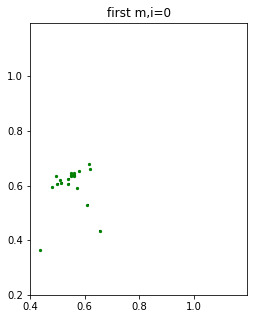

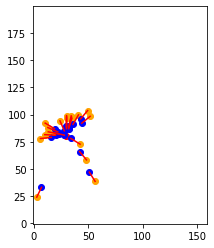

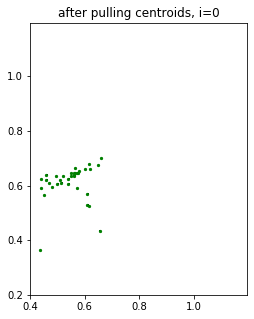

0 26.0.,

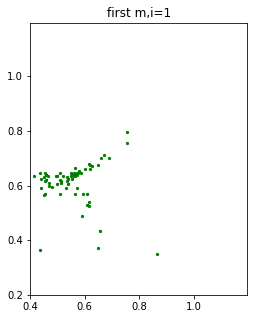

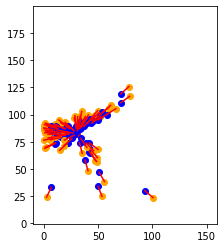

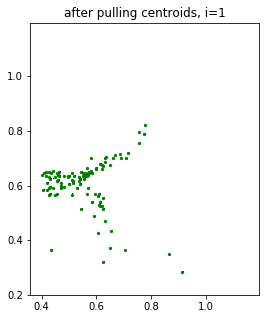

1 75.0.,

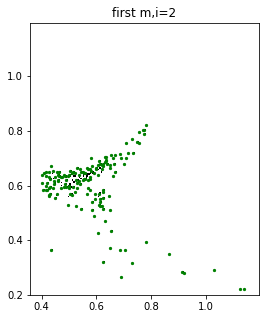

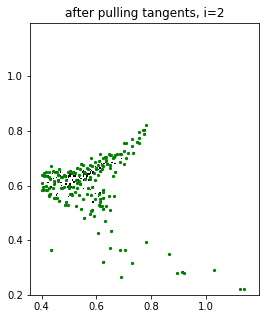

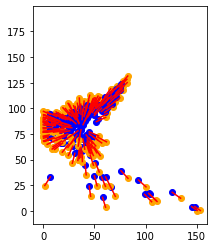

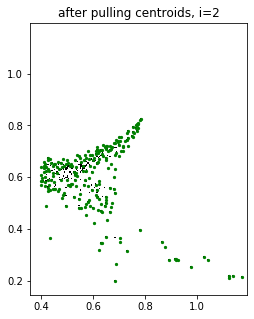

2 230.0.,

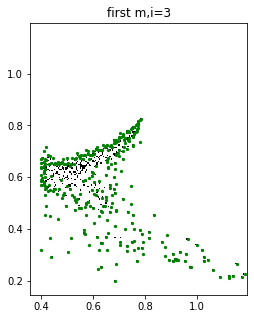

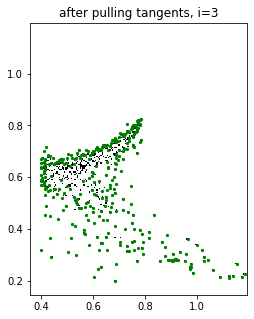

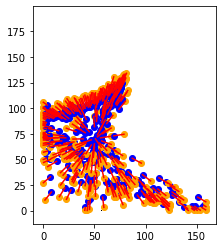

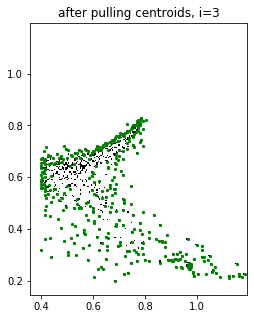

3 385.0.,

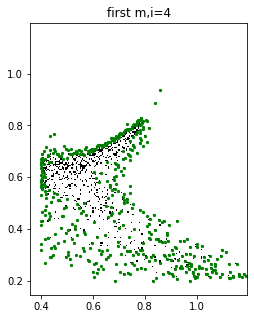

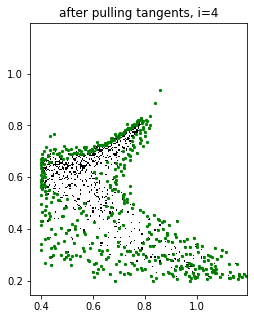

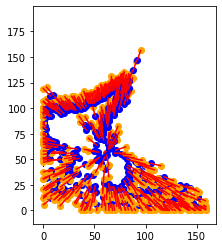

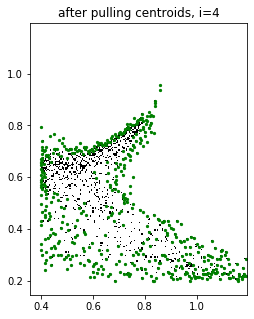

4 480.0.,time difference 996.7717649936676
False


In [7]:

name_save='exampletwoconf'
outfolder='./btwoconf/exampleBF'

if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

constraintdict={2:{'target':0,'fcd':0.1,'fcu':10}, #parameter with index 2 is in a 10x lower-higher range of parameter with index 0
               3:{'target':1,'gt':1}, #parameter with index 3 is greater than parameter with index 1
               6:{'target':4,'lt':1}, #parameter with index 6 is lower than parameter with index 4
               } 

settings=defaultsettings.copy()
settings['constraints']=constraintdict
settings['compute_x_y_f']=myfbs2c2
settings['npars']=24

#Initialise and get first 10 points
ti=time.time()
BE=BF.BoundaryExplorer(**settings)
BE.get_initial_points(10)

#Extend boundary
args=defaultargs.copy()
args['folder_save']=outfolder
args['name_save']=name_save
BE.extend_boundary(**args)

#Save final results
name='%s_last'%(name_save)
outfolder_final=outfolder
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)

te=time.time()
print('time difference',te-ti)   
print(BE.converged)

In [3]:
pars=np.array([3.5388446613421465,1000.0,15.851303175073912,1000.0,21.417636230689855,0.06042844624032376,0.6832815701885009,0.001,0.001,0.001,0.5758933028059618,0.001,0.01609392819549185,0.001,0.001,0.001,0.001,0.001,8.390134306353167,5.450502543761665,0.001,0.00270440799409399,0.19783168759715544,0.001])
myfbs2c2(pars)

3.5388446613421465,1000.0,15.851303175073912,1000.0,21.417636230689855,0.06042844624032376,0.6832815701885009,0.001,0.001,0.001,0.5758933028059618,0.001,0.01609392819549185,0.001,0.001,0.001,0.001,0.001,8.390134306353167,5.450502543761665,0.001,0.00270440799409399,0.19783168759715544,0.001,


[0.5723776869501698, 0.4813252376535701]